<a href="https://colab.research.google.com/github/Mohansabariraja/ClUSTERING/blob/main/Mall_customers_Clustering_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
d = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
d.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
encoder = LabelEncoder()
d['Genre'] = encoder.fit_transform(d['Genre'])
d.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
x = d.drop(['CustomerID','Genre'], axis=1)

In [ ]:
standard_scalar = preprocessing.StandardScaler()
x = standard_scalar.fit_transform(x)

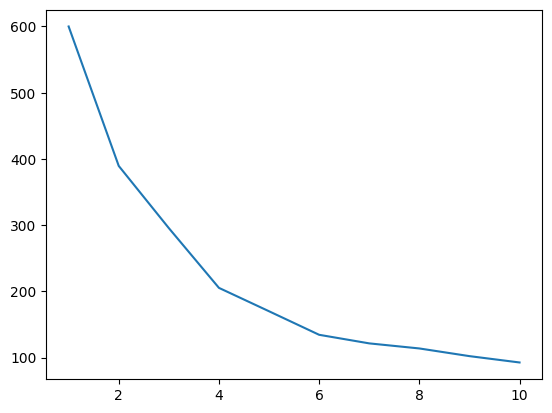

In [ ]:
wcss =[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)

In [ ]:
m = KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans = m.fit_predict(x)

In [ ]:
m.inertia_

169.89149793438568

In [ ]:
d['cluster'] = kmeans
d.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,3
3,4,0,23,16,77,2
4,5,0,31,17,40,2


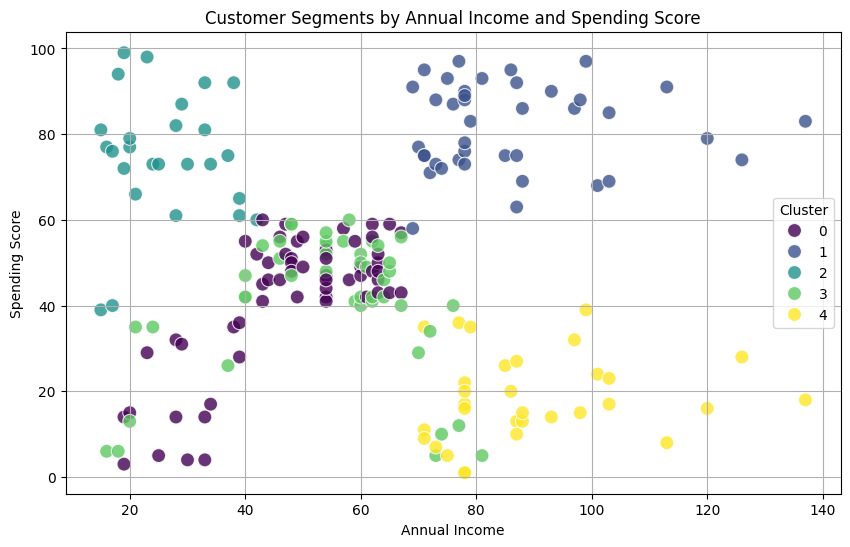

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income_(k$)',y='Spending_Score',hue='cluster',data=d,palette='viridis',s=100,alpha=0.8)
plt.title('Customer Segments by Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()